**Tensorflow/ Keras**   

This file consists of the following using:
  
  - Tensorflow built in layers functional API
  - Tensorflow from scratch low level API
  - Tensorflow High level API
    - Using einsum and tensor
    - 3 layer neural network
    - 2 and 3 variable based non linear equation(quadratic and cubic non linear equation)
    - Relu for non-linear activation function, implemented chain rule based gradient propagation
    - used appropriate number of neurons and epochs
    - SGD and Adam optimizer for optimization


In [1]:
!pip install --upgrade umap-learn
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

In [4]:
def plot_4d(x, y, y_pred=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y.numpy().flatten(), cmap='Blues_r', label='underlying function')
    if y_pred is not None:
        ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_pred.numpy().flatten(), cmap='Reds_r', label='our function')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.legend()

x: (300, 3), weights: (1, 3), bias: (1,), y: (300,)


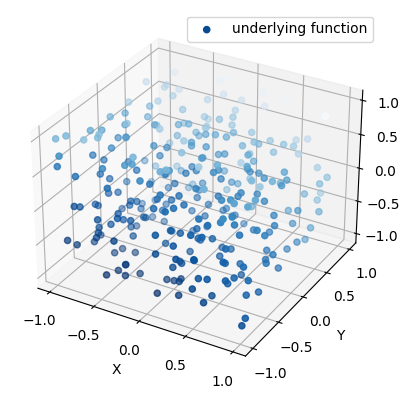

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import umap
import plotly.graph_objects as go


n = 300
d = 3
x = tf.random.uniform((n, d), -1, 1)

weights_true = tf.constant([[2, 5, 7]], dtype=tf.float32)
bias_true = tf.constant([1], dtype=tf.float32)

y_true = tf.einsum('ij, kj->i', tf.pow(x, 3), weights_true) + tf.einsum('ij, kj->i', tf.pow(x, 2), weights_true) + tf.einsum('ij, kj->i', x, weights_true) + bias_true

print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_4d(x.numpy(), y_true)


###Tensorflow built-in Functional API

cubic equation data(3 dim)

2x^3 + 5x^2 + 7x + 1

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_1 (Dense)             (None, 30)                120       
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 30)                930       
                                                                 
 regression (Dense)          (None, 1)                 31        
                                                                 
Total params: 2011 (7.86 KB)
Trainable params: 2011 (7.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/150
10/10 [=====

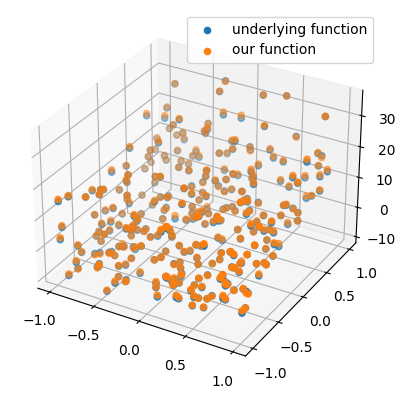

In [6]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

inputs = keras.Input(shape=(3,))
l1 = layers.Dense(30, activation='relu', name='dense_1')(inputs)
l2 = layers.Dense(30, activation='relu', name='dense_2')(l1)
l3 = layers.Dense(30, activation='relu', name='dense_3')(l2)
outputs = layers.Dense(1, name='regression')(l3)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
model.compile(loss='mse', optimizer=optimizers.SGD(0.01))

model.fit(x, y_true, epochs=150)

y_pred = model.predict(x)

plot_3d(x, y_true, model(x))

In [7]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

x: (200, 2), weights: (1, 2), bias: (1,), y: (200,)


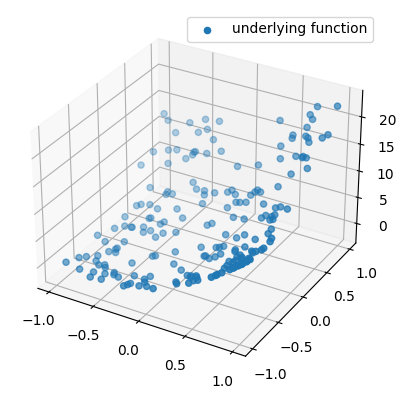

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import umap
import plotly.graph_objects as go

n = 200
d = 2
x = tf.random.uniform((n, d), -1, 1)

weights_true = tf.constant([[5, 7]], dtype=tf.float32)
bias_true = tf.constant([1], dtype=tf.float32)

y_true = tf.einsum('ij, kj->i', tf.pow(x, 2), weights_true) + tf.einsum('ij, kj->i', x, weights_true) + bias_true

#print(x**2)
#print("wt true")
#print(weights_true)
#print("y true")
#print(y_true)
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_3d(x.numpy(), y_true)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 20)                60        
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 regression (Dense)          (None, 1)                 21        
                                                                 
Total params: 501 (1.96 KB)
Trainable params: 501 (1.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
7/7 [==============================] - 1s 5ms/step - loss: 51.7200
Epoch 2/50
7/7 [==============================] - 0s 5ms/step - loss: 23.3868


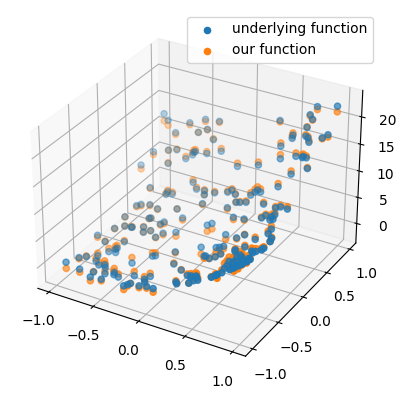

In [9]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

inputs = keras.Input(shape=(2,))
l1 = layers.Dense(20, activation='relu', name='dense_1')(inputs)
l2 = layers.Dense(20, activation='relu', name='dense_2')(l1)
outputs = layers.Dense(1, name='regression')(l2)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
model.compile(loss='mse', optimizer=optimizers.SGD(0.01))

model.fit(x, y_true, epochs=50)

y_pred = model.predict(x)

plot_3d(x, y_true, model(x))



###Tensorflow low level API

In [10]:
!pip install tensorflow

In [14]:
class Linear(Layer):
  """y = w.x + b"""

  def __init__(self, units=32, input_dim=32):
      super(Linear, self).__init__()
      w_init = tf.random_normal_initializer()
      self.w = tf.Variable(
          initial_value=w_init(shape=(input_dim, units), dtype='float32'),
          trainable=True)
      b_init = tf.zeros_initializer()
      self.b = tf.Variable(
          initial_value=b_init(shape=(units,), dtype='float32'),
          trainable=True)

  def call(self, inputs):
      return tf.matmul(inputs, self.w) + self.b

# Instantiate our layer.
linear_layer = Linear(4, 2)

In [16]:
y = linear_layer(tf.ones((2, 2)))
assert y.shape == (2, 4)

In [15]:
# Weights are automatically tracked under the `weights` property.
assert linear_layer.weights == [linear_layer.w, linear_layer.b]

In [17]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Layer
import tensorflow as tf

# Prepare a dataset.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train[:].reshape(60000, 784).astype('float32') / 255
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset = dataset.shuffle(buffer_size=1024).batch(64)

# Instantiate a simple classification model
model = tf.keras.Sequential([
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(10)
])

# Instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam()

# Iterate over the batches of the dataset.
for step, (x, y) in enumerate(dataset):
  # Open a GradientTape.
  with tf.GradientTape() as tape:

    # Forward pass.
    logits = model(x)

    # Loss value for this batch.
    loss_value = loss(y, logits)

  # Get gradients of loss wrt the weights.
  gradients = tape.gradient(loss_value, model.trainable_weights)

  # Update the weights of our linear layer.
  optimizer.apply_gradients(zip(gradients, model.trainable_weights))

  # Update the running accuracy.
  accuracy.update_state(y, logits)

  # Logging.
  if step % 100 == 0:
    print('Step:', step)
    print('Loss from last step: %.3f' % loss_value)
    print('Total running accuracy so far: %.3f' % accuracy.result())

Step: 0
Loss from last step: 2.278
Total running accuracy so far: 0.172
Step: 100
Loss from last step: 0.348
Total running accuracy so far: 0.841
Step: 200
Loss from last step: 0.202
Total running accuracy so far: 0.877
Step: 300
Loss from last step: 0.365
Total running accuracy so far: 0.895
Step: 400
Loss from last step: 0.120
Total running accuracy so far: 0.907
Step: 500
Loss from last step: 0.134
Total running accuracy so far: 0.915
Step: 600
Loss from last step: 0.164
Total running accuracy so far: 0.921
Step: 700
Loss from last step: 0.275
Total running accuracy so far: 0.927
Step: 800
Loss from last step: 0.301
Total running accuracy so far: 0.930
Step: 900
Loss from last step: 0.058
Total running accuracy so far: 0.934


###High Level API

In [18]:
# Reuse the Linear class
# with a `build` method that we defined above.

class MLP(Layer):
    """Simple stack of Linear layers."""

    def __init__(self):
        super(MLP, self).__init__()
        self.linear_1 = Linear(32)
        self.linear_2 = Linear(32)
        self.linear_3 = Linear(10)

    def call(self, inputs):
        x = self.linear_1(inputs)
        x = tf.nn.relu(x)
        x = self.linear_2(x)
        x = tf.nn.relu(x)
        return self.linear_3(x)

mlp = MLP()

# The first call to the `mlp` object will create the weights.
y = mlp(tf.ones(shape=(3, 32)))

# Weights are recursively tracked.
assert len(mlp.weights) == 6

In [19]:
from tensorflow.keras.layers import Layer

class Dropout(Layer):

  def __init__(self, rate):
    super(Dropout, self).__init__()
    self.rate = rate

  def call(self, inputs, training=None):
    if training:
      return tf.nn.dropout(inputs, rate=self.rate)
    return inputs

class MLPWithDropout(Layer):

  def __init__(self):
      super(MLPWithDropout, self).__init__()
      self.linear_1 = Linear(32)
      self.dropout = Dropout(0.5)
      self.linear_3 = Linear(10)

  def call(self, inputs, training=None):
      x = self.linear_1(inputs)
      x = tf.nn.relu(x)
      x = self.dropout(x, training=training)
      return self.linear_3(x)

mlp = MLPWithDropout()
y_train = mlp(tf.ones((32, 32)), training=True)
y_test = mlp(tf.ones((32, 32)), training=False)

In [20]:
inputs = tf.keras.Input(shape=(32,))

# We call layers on these "type" objects
# and they return updated types (new shapes/dtypes).
x = Linear(32)(inputs) # We are reusing the Linear layer we defined earlier.
x = Dropout(0.5)(x) # We are reusing the Dropout layer we defined earlier.
outputs = Linear(10)(x)

# A functional `Model` can be defined by specifying inputs and outputs.
# A model is itself a layer like any other.
model = tf.keras.Model(inputs, outputs)

# A functional model already has weights, before being called on any data.
# That's because we defined its input shape in advance (in `Input`).
assert len(model.weights) == 4

# Let's call our model on some data.
y = model(tf.ones((2, 32)))
assert y.shape == (2, 10)

In [21]:
from tensorflow.keras import Sequential

model = Sequential([Linear(32), Dropout(0.5), Linear(10)])

y = model(tf.ones((2, 32)))
assert y.shape == (2, 10)

In [22]:
bce = tf.keras.losses.BinaryCrossentropy()
y_true = [0., 0., 1., 1.]  # Targets
y_pred = [1., 1., 1., 0.]  # Predictions
loss = bce(y_true, y_pred)
print('Loss:', loss.numpy())

Loss: 11.522857


In [23]:
m = tf.keras.metrics.AUC()
m.update_state([0, 1, 1, 1], [0, 1, 0, 0])
print('Intermediate result:', m.result().numpy())

m.update_state([1, 1, 1, 1], [0, 1, 1, 0])
print('Final result:', m.result().numpy())

Intermediate result: 0.6666667
Final result: 0.71428573


In [24]:
class BinaryTruePositives(tf.keras.metrics.Metric):

  def __init__(self, name='binary_true_positives', **kwargs):
    super(BinaryTruePositives, self).__init__(name=name, **kwargs)
    self.true_positives = self.add_weight(name='tp', initializer='zeros')

  def update_state(self, y_true, y_pred, sample_weight=None):
    y_true = tf.cast(y_true, tf.bool)
    y_pred = tf.cast(y_pred, tf.bool)

    values = tf.logical_and(tf.equal(y_true, True), tf.equal(y_pred, True))
    values = tf.cast(values, self.dtype)
    if sample_weight is not None:
      sample_weight = tf.cast(sample_weight, self.dtype)
      values = tf.multiply(values, sample_weight)
    self.true_positives.assign_add(tf.reduce_sum(values))

  def result(self):
    return self.true_positives

  def reset_states(self):
    self.true_positive.assign(0)

m = BinaryTruePositives()
m.update_state([0, 1, 1, 1], [0, 1, 0, 0])
print('Intermediate result:', m.result().numpy())

m.update_state([1, 1, 1, 1], [0, 1, 1, 0])
print('Final result:', m.result().numpy())

Intermediate result: 1.0
Final result: 3.0


Optimizer classes & a quick end-to-end training loop

In [25]:
from tensorflow.keras import layers

# Prepare a dataset.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train[:].reshape(60000, 784).astype('float32') / 255
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset = dataset.shuffle(buffer_size=1024).batch(64)

# Instantiate a simple classification model
model = tf.keras.Sequential([
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(10)
])

# Instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam()

# Iterate over the batches of the dataset.
for step, (x, y) in enumerate(dataset):
  # Open a GradientTape.
  with tf.GradientTape() as tape:

    # Forward pass.
    logits = model(x)

    # Loss value for this batch.
    loss_value = loss(y, logits)

  # Get gradients of loss wrt the weights.
  gradients = tape.gradient(loss_value, model.trainable_weights)

  # Update the weights of our linear layer.
  optimizer.apply_gradients(zip(gradients, model.trainable_weights))

  # Update the running accuracy.
  accuracy.update_state(y, logits)

  # Logging.
  if step % 100 == 0:
    print('Step:', step)
    print('Loss from last step: %.3f' % loss_value)
    print('Total running accuracy so far: %.3f' % accuracy.result())

Step: 0
Loss from last step: 2.257
Total running accuracy so far: 0.109
Step: 100
Loss from last step: 0.233
Total running accuracy so far: 0.832
Step: 200
Loss from last step: 0.326
Total running accuracy so far: 0.874
Step: 300
Loss from last step: 0.140
Total running accuracy so far: 0.893
Step: 400
Loss from last step: 0.077
Total running accuracy so far: 0.906
Step: 500
Loss from last step: 0.096
Total running accuracy so far: 0.915
Step: 600
Loss from last step: 0.090
Total running accuracy so far: 0.921
Step: 700
Loss from last step: 0.094
Total running accuracy so far: 0.926
Step: 800
Loss from last step: 0.090
Total running accuracy so far: 0.929
Step: 900
Loss from last step: 0.070
Total running accuracy so far: 0.933


Reuse SparseCategoricalAccuracy metric instance to implement a testing loop:

In [26]:
x_test = x_test[:].reshape(10000, 784).astype('float32') / 255
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(128)

accuracy.reset_states()  # This clears the internal state of the metric

for step, (x, y) in enumerate(test_dataset):
  logits = model(x)
  accuracy.update_state(y, logits)

print('Final test accuracy: %.3f' % accuracy.result())

Final test accuracy: 0.965


###Trying out End-to-end Variational AutoEncoder (VAE)

built-in training loops

In [27]:
# Prepare a dataset.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset = dataset.shuffle(buffer_size=1024).batch(64)

# Instantiate a simple classification model
model = tf.keras.Sequential([
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(10)
])

# Instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam()

call `compile` to configure the optimizer, loss, and metrics to monitor.

In [28]:
model.compile(optimizer=optimizer, loss=loss, metrics=[accuracy])

Then we call `fit` on our model to pass it the data:

In [29]:
model.fit(dataset, epochs=3)

Epoch 1/3
938/938 [==============================] - 8s 8ms/step - loss: 0.2232 - sparse_categorical_accuracy: 0.9344
Epoch 2/3
938/938 [==============================] - 6s 7ms/step - loss: 0.0880 - sparse_categorical_accuracy: 0.9727
Epoch 3/3
938/938 [==============================] - 7s 7ms/step - loss: 0.0580 - sparse_categorical_accuracy: 0.9822


Testing the above model

In [30]:
x_test = x_test[:].reshape(10000, 784).astype('float32') / 255
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(128)

loss, acc = model.evaluate(test_dataset)
print('loss: %.3f - acc: %.3f' % (loss, acc))

79/79 [==============================] - 1s 7ms/step - loss: 0.0941 - sparse_categorical_accuracy: 0.9710
loss: 0.094 - acc: 0.971


Monitor loss and metrics on some validation data during `fit`.

Also, calling fit method

In [31]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255

num_val_samples = 10000
x_val = x_train[-num_val_samples:]
y_val = y_train[-num_val_samples:]
x_train = x_train[:-num_val_samples]
y_train = y_train[:-num_val_samples]

# Instantiate a simple classification model
model = tf.keras.Sequential([
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(10)
])

# Instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=[accuracy])
model.fit(x_train, y_train,
          validation_data=(x_val, y_val),
          epochs=3,
          batch_size=64)

Epoch 1/3
782/782 [==============================] - 7s 8ms/step - loss: 0.2420 - sparse_categorical_accuracy: 0.9293 - val_loss: 0.1088 - val_sparse_categorical_accuracy: 0.9689
Epoch 2/3
782/782 [==============================] - 7s 9ms/step - loss: 0.0935 - sparse_categorical_accuracy: 0.9716 - val_loss: 0.0814 - val_sparse_categorical_accuracy: 0.9757
Epoch 3/3
782/782 [==============================] - 7s 9ms/step - loss: 0.0617 - sparse_categorical_accuracy: 0.9805 - val_loss: 0.0845 - val_sparse_categorical_accuracy: 0.9751


In [32]:
import tensorflow as tf

input_dim = 2
output_dim = 1
learning_rate = 0.01

# This is our weight matrix
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
# This is our bias vector
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def compute_predictions(features):
  return tf.matmul(features, w) + b

def compute_loss(labels, predictions):
  return tf.reduce_mean(tf.square(labels - predictions))

def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)
    # Note that `tape.gradient` works with a list as well (w, b).
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

###Trying out dataset generation and tf.function

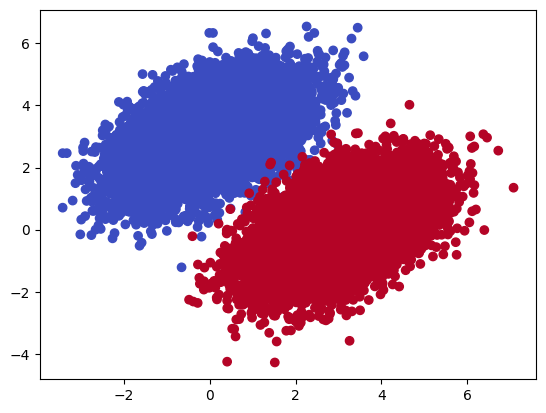

In [42]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Prepare a dataset.
num_samples = 10000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples, 1), dtype='float32'),
                    np.ones((num_samples, 1), dtype='float32')))

plt.scatter(features[:, 0], features[:, 1], cmap="coolwarm", c=labels[:, 0])

In [34]:
# Shuffle the data.
indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]

# Create a tf.data.Dataset object for easy batched iteration
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

for epoch in range(10):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.0545
Epoch 1: last batch loss = 0.0453
Epoch 2: last batch loss = 0.0413
Epoch 3: last batch loss = 0.0339
Epoch 4: last batch loss = 0.0320
Epoch 5: last batch loss = 0.0261
Epoch 6: last batch loss = 0.0226
Epoch 7: last batch loss = 0.0315
Epoch 8: last batch loss = 0.0193
Epoch 9: last batch loss = 0.0348


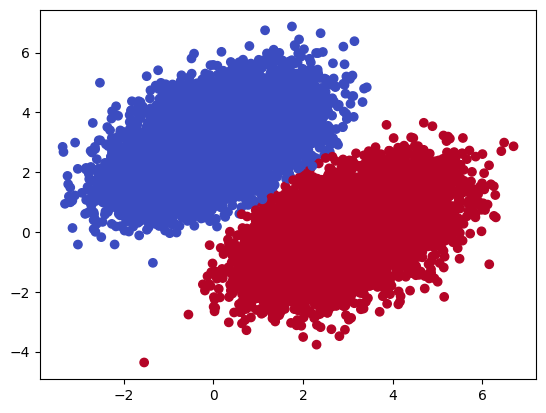

In [40]:
predictions = compute_predictions(features)
plt.scatter(features[:, 0], features[:, 1], cmap='coolwarm', c=predictions[:, 0] > 0.5)

In [36]:
import time

t0 = time.time()
for epoch in range(20):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
t_end = time.time() - t0
print('Time per epoch: %.3f s' % (t_end / 20,))


Time per epoch: 0.674 s


In [37]:
@tf.function
def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

In [38]:
t0 = time.time()
for epoch in range(20):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
t_end = time.time() - t0
print('Time per epoch: %.3f s' % (t_end / 20,))

Time per epoch: 0.181 s
